In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib
import matplotlib.pyplot as pp
%matplotlib inline

In [6]:
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [7]:
n = 100
k = 61

with pm.Model() as coin_context:
    p = pm.Uniform('p',0.40,0.80)
    
    y = pm.Binomial('y',n=n,p=p,observed=k)
    
    trace = pm.sample(10000)

/usr/local/lib/python3.8/dist-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 8 seconds.


In [11]:
pm.summary(trace)

AttributeError: module 'pymc3' has no attribute 'summary'

In [9]:
pm.traceplot(trace)

AttributeError: module 'pymc3' has no attribute 'traceplot'

In [12]:
gdata=pd.read_csv('gapminder.csv').query('year == 1985')

In [13]:
gdata.sort_values('age5_surviving',inplace=True)

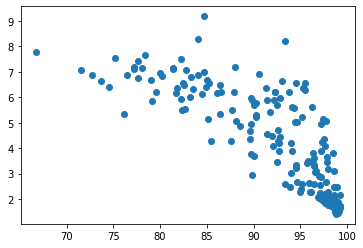

In [14]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])

In [15]:
with pm.Model() as gapminder_context:
    intercept = pm.Uniform('intercept',5,15)
    slope = pm.Uniform('slope',-1,1)
    
    babies = pm.Normal('babies',
                       mu = intercept + slope * (gdata['age5_surviving'] - 65),
                       sd = 1,
                       observed = gdata['babies_per_woman'])
    
    trace = pm.sample(10000)

/usr/local/lib/python3.8/dist-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [slope, intercept]


/usr/local/lib/python3.8/dist-packages/pymc3/math.py:246: RuntimeWarning: divide by zero encountered in log1p
  return np.where(x < 0.6931471805599453, np.log(-np.expm1(-x)), np.log1p(-np.exp(-x)))
/usr/local/lib/python3.8/dist-packages/pymc3/math.py:246: RuntimeWarning: divide by zero encountered in log1p
  return np.where(x < 0.6931471805599453, np.log(-np.expm1(-x)), np.log1p(-np.exp(-x)))
Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 32 seconds.
The acceptance probability does not match the target. It is 0.8844082888452313, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8845376939521294, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [16]:
pm.summary(trace)

AttributeError: module 'pymc3' has no attribute 'summary'

In [17]:
pm.traceplot(trace)

AttributeError: module 'pymc3' has no attribute 'traceplot'

In [18]:
babies = trace['intercept'].mean() + trace['slope'].mean() * (gdata['age5_surviving'] - 65)

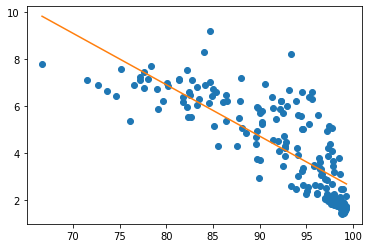

In [19]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])
pp.plot(gdata['age5_surviving'],babies,'C1')

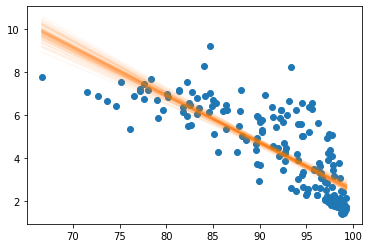

In [20]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])
for i, intercept, slope in zip(range(100),trace['intercept'][::50],trace['slope'][::50]):
    babies = intercept + slope * (gdata['age5_surviving'] - 65)
    pp.plot(gdata['age5_surviving'],babies,'C1',alpha=0.05)